First thing first, let us import our custom library (which contains every function built to realize from scratch the clustering procedure) and some visualization utilities.

In [1]:
import clustering_lib as cl
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The second step will consist in creating the dataframe: we will not just import the data, the final structure will include three additional columns, namely: "Principal Component 1", "Principal Component 2" and "Principal Component 3". As the names suggest, those are the results of a PCA ran over our data. We decided to carry this out in order to better visualize the clouds of points discriminated by the "Type" attribute. Furthermore, since we are dealing with a clustering problem, we decided to scale all values so that they will become adimensional and improve comparability. We will print the first five rows to take a look.

In [2]:
processed_dataframe = cl.dataframe()

C:\Users\Giorgio\Documents\Data Science\ADM\HW4\clustering_lib.py:32: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  scaled_data_unlabelled = scale(data_unlabelled)


In [3]:
processed_dataframe.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Principal Component 1,Principal Component 2,Principal Component 3
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,-0.165739
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,-2.026457
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0.982819
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,-0.176192
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,2.026688


And now, let us draw a scatterplot to verify the success of our previous choice.

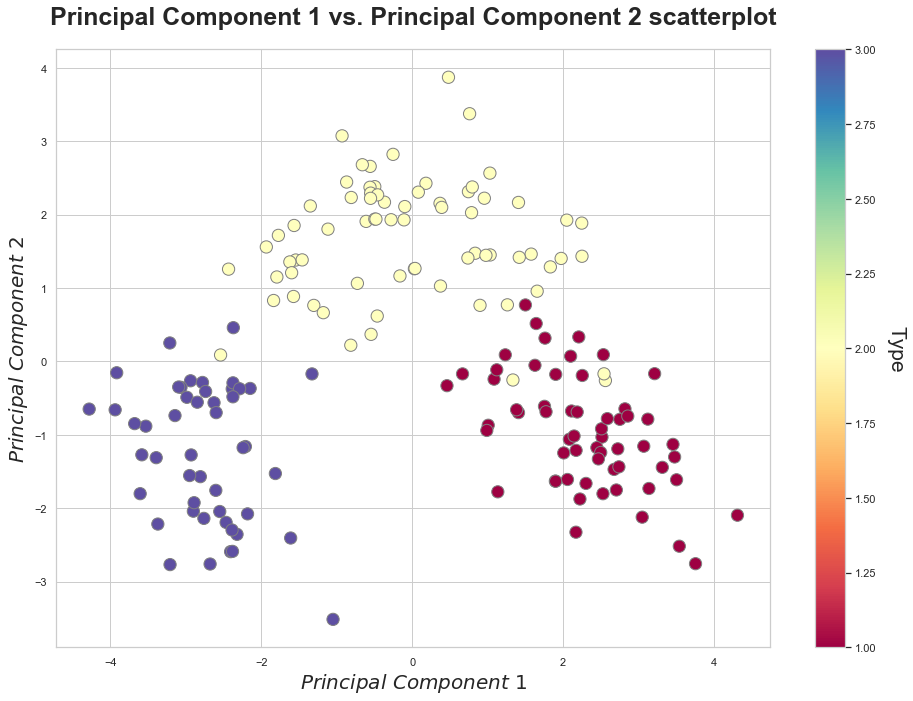

In [4]:
cl.scatterplot(processed_dataframe, 'Principal Component 1', 'Principal Component 2', color ='Type')

As we can see, resorting to principal components instead of randomly picking variables, allows us to perfectly recognize the clustering pattern defined by the pre-existing "Type" attribute.
Our aim, at this point, will be that of verifying if a K-means algorithm can succeed in reproducing the same result.

The next move will be setting up the values taken as input by our k_means clustering function and running the algorithm.

In [5]:
max_iterations, k = 100, 3
# The value of max_iterations is set to 500 by default, while that of k to 1.

In [6]:
centroids, clusters_changes, iterations, data_and_distances = cl.k_means(processed_dataframe, max_iterations, k)

The K-means algorithm converged after 9 iterations.


In [7]:
centroids.drop(columns = list(centroids.columns[13:19]))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Centroids,,,,,,,,,,,,,
0.0,-0.926820,-0.371033,-0.450278,0.211241,-0.604859,-0.057025,0.036270,-0.004706,0.002319,-0.904000,0.446860,0.275848,-0.776474
1.0,0.780928,-0.329278,0.294308,-0.625796,0.655551,0.836537,0.932697,-0.573949,0.619046,0.139587,0.488313,0.758352,1.088740
2.0,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


In [8]:
plot_data = {'clusters_changes': clusters_changes, 'iterations': 9, 'K': k, 'data': data_and_distances}

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


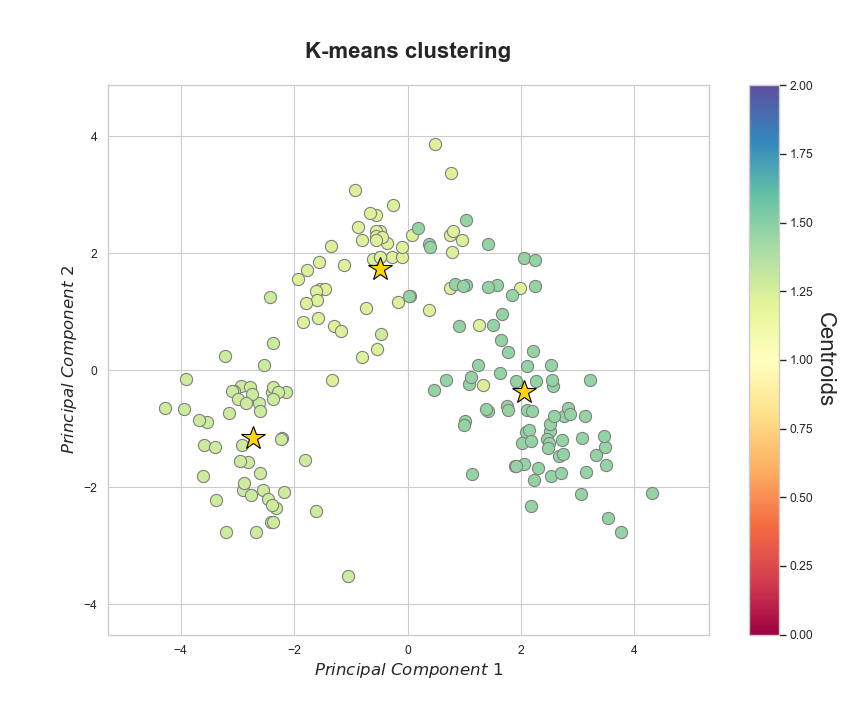

In [10]:
k_means_clustering_plot = cl.SubplotAnimation(plot_data)
plt.show()
HTML(k_means_clustering_plot.to_jshtml())

<IPython.core.display.Javascript object>


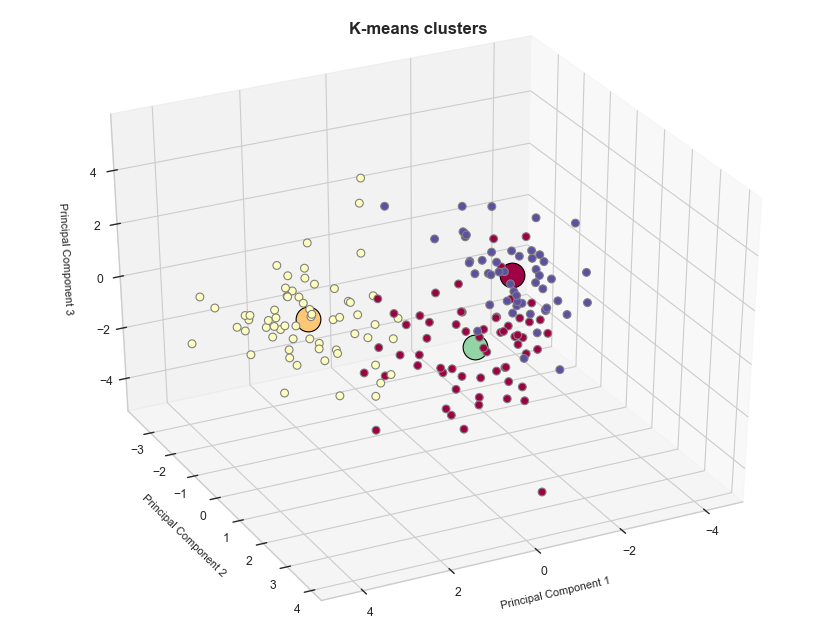

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<IPython.core.display.HTML object>

In [11]:
scatterplot_3D = cl.scatterplot_3D(data_and_distances, centroids)
display(HTML(scatterplot_3D))